# 01: Analyze LLM Architectures

This tutorial aims to analyze the component inside  LLMs. This is very important when working with LLMs to debug the model and know their capabilities and limits.

## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

## 2. Utils

The utils functions help for:
- Load from a list of (small) models.  eel free to try other models until the GPU memory is not enough!
- Make plots.
- Iterate over evaluation and model configurations.

In [2]:
def plot_module_stats(data_dict, x_label, y_label, title):
    """
    Creates a bar plot to visualize module statistics.

    Args:
        data_dict (dict): Dictionary containing the data to plot, where keys are labels and values are the corresponding values
        x_label (str): Label for the x-axis
        y_label (str): Label for the y-axis 
        title (str): Title of the plot

    Returns:
        None: Displays the plot using matplotlib
    """
    plt.figure(figsize=(10, 6))
    plt.bar(data_dict.keys(), data_dict.values())
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
model_ids = [
    "facebook/opt-125m",
    # "facebook/opt-350m", 
    # "facebook/opt-1.3b",
    # "facebook/opt-2.7b",
    # "meta-llama/Llama-3.2-1B",
    # "meta-llama/Llama-3.2-1B-Instruct",
    # "meta-llama/Llama-3.2-3B-Instruct",
    # "google/gemma-3-1b-it",
    # "google/gemma-3-4b-it",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    # "microsoft/Phi-4-mini-instruct",
    # "HuggingFaceTB/SmolLM-135M",
    # "HuggingFaceTB/SmolLM-135M-instruct",
    # "HuggingFaceTB/SmolLM-360M", 
    # "HuggingFaceTB/SmolLM-360M-Instruct",
    # "HuggingFaceTB/SmolLM-1.7B",
    # "HuggingFaceTB/SmolLM-1.7B-Instruct",
    # "HuggingFaceTB/SmolLM2-135M",
    # "HuggingFaceTB/SmolLM2-135M-Instruct",
    # "HuggingFaceTB/SmolLM2-360M",
    # "HuggingFaceTB/SmolLM2-360M-Instruct", 
    # "HuggingFaceTB/SmolLM2-1.7B",
    # "HuggingFaceTB/SmolLM2-1.7B-Instruct",
    # "PleIAs/Pleias-350m-Preview",
    # "PleIAs/Pleias-Pico",
    # "PleIAs/Pleias-1.2b-Preview",
    # "PleIAs/Pleias-Nano",
    # "PleIAs/Pleias-3b-Preview",
]

# Load the one model from the list
model_id = model_ids[0]
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype="auto").cuda()
tokenizer = AutoTokenizer.from_pretrained(model_id)

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/251M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

## 3. Analyze LLM architectures

### 3.1 General LLM information

**Implementation task:**
- Implement the function `get_model_info` to get the general information of the LLM model.
- Extract the information for multiple LLMs.

**Questions:**
- What is the hidden size?
- How many attention heads?
- How many layers?
- What is the vocab size?
- What is the model type?
- What is the architecture?
- What is the max context length?

In [4]:
def get_model_info(model):
    """
    Returns basic information about the loaded LLM model.
    
    Args:
        model: The loaded model
        
    Returns:
        dict: Dictionary containing model information
    """
    ### To Complete ###
    ### End of To Complete ###

    return info


In [5]:
model_info = get_model_info(model)
print(model_info)

{'hidden_size': 768, 'num_attention_heads': 12, 'num_hidden_layers': 12, 'vocab_size': 50272, 'model_type': 'opt', 'architecture': 'OPTForCausalLM', 'max_context_length': 2048}


### 3.2 Tokenization

**Implementation task:**
- Use the tokenizer to tokenize an input sentence with typos and without typos (or other input variations).
- Repeat the experiment for multiple LLMs.

**Questions:**
- How does input sentence mistakes impact the tokenization?
- Does it impact the model performance?

In [6]:
# Test sentences - one with typos and one without
correct_sentence = "The quick brown fox jumps over the lazy dog."
typo_sentence = "Teh quik brwn fox jmps ovr the lzy dog."

### To Complete ###
### End of To Complete ###

Correct sentence tokens:
['</s>', 'The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']

Typo sentence tokens:
['</s>', 'Te', 'h', 'Ġqu', 'ik', 'Ġbr', 'wn', 'Ġfox', 'Ġj', 'm', 'ps', 'Ġov', 'r', 'Ġthe', 'Ġl', 'zy', 'Ġdog', '.']


### 3.3 LLM modules

**Implementation task:**
- Implement a function that identifies and counts the module of each type in the model.
- Repeat the experiment for multiple LLMs.

**Questions:**
- What does each module do?
- What are the modules that are here only once?
- What are the modules that are here multiple times?
- What is the most common module?

In [7]:
def count_modules(model):
    """Count the number of each type of module in the model.
    
    Args:
        model: The PyTorch model to analyze
        
    Returns:
        dict: A dictionary mapping module type names to their counts
    """
    module_counts = {}
    ### To Complete ###
    ### End of To Complete ###
    return module_counts

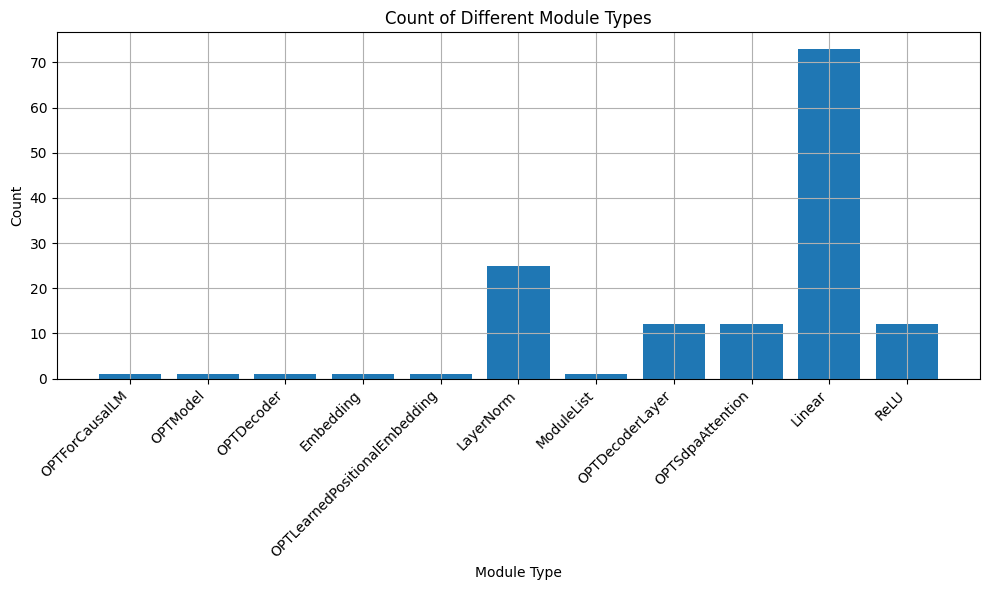

In [8]:
module_counts = count_modules(model)

plot_module_stats(
    module_counts,
    x_label="Module Type",
    y_label="Count",
    title="Count of Different Module Types"
)

### 3.4 LLM parameters

**Implementation task:**
- Implement a function that counts the paramter in each module type in the model.
- Repeat the experiment for multiple LLMs.

**Questions:**
- What are the modules with the least parameters?
- What are the modules with the most parameters?
- How many parameters are there in each module?
- What is the layer type with the most parameters?

In [9]:
def count_module_parameters(model):
    """Count the number of parameters in each module type in the model.
    
    Args:
        model: The PyTorch model to analyze
        
    Returns:
        dict: A dictionary mapping module type names to their total parameter counts
    """
    module_parameters = {}
    ### To Complete ###
    ### End of To Complete ###
    return module_parameters

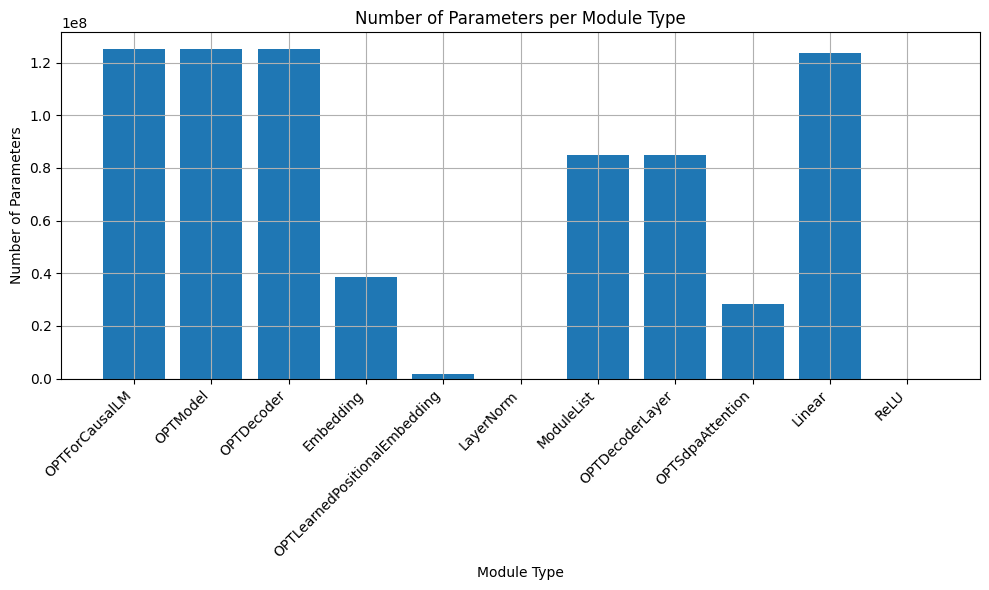

In [10]:
module_parameters = count_module_parameters(model)

plot_module_stats(
    module_parameters,
    x_label="Module Type",
    y_label="Number of Parameters",
    title="Number of Parameters per Module Type"
)

**Implementation task:**
- Implement a function that returns the precision of the parameters in each module type (that has parameters) in the model.
- Repeat the experiment for multiple LLMs.

**Questions:**
- What is the precision of the parameters in each module?

In [11]:
def get_module_precisions(model):
    """
    Returns a dictionary mapping module types to their parameter precision/dtype.
    
    Args:
        model: PyTorch model
        
    Returns:
        dict: Mapping of module type names to their parameter dtype
    """
    module_dtypes = {}
    ### To Complete ###
    ### End of To Complete ###
    return module_dtypes


In [12]:
module_precisions = get_module_precisions(model)
for module_type, dtype in module_precisions.items():
    print(f"- {module_type} parameters dtype: {dtype}")

- OPTForCausalLM parameters dtype: torch.float16
- OPTModel parameters dtype: torch.float16
- OPTDecoder parameters dtype: torch.float16
- Embedding parameters dtype: torch.float16
- OPTLearnedPositionalEmbedding parameters dtype: torch.float16
- LayerNorm parameters dtype: torch.float16
- ModuleList parameters dtype: torch.float16
- OPTDecoderLayer parameters dtype: torch.float16
- OPTSdpaAttention parameters dtype: torch.float16
- Linear parameters dtype: torch.float16


**Implementation task:**
- Implement a function that combines the number of parameters and the precision of the parameters in each module type to estimate the memory footprint of the model.
- Repeat the experiment for multiple LLMs.

**Questions:**
- What is the estimated memory footprint of the model based on the precision and number of parameters of each module?
- What are the limits of this estimation?

In [17]:
def estimate_memory_footprint(module_parameters, module_precisions):
    """
    Estimates the memory footprint of a model based on parameter counts and precisions.
    
    Args:
        module_parameters: Dict mapping module types to parameter counts
        module_precisions: Dict mapping module types to parameter dtypes
        
    Returns:
        dict: Memory usage in bytes for each module type
        float: Total memory usage in bytes
    """
    ### To Complete ###
    ### End of To Complete ###
    return memory_usage, total_memory

In [18]:
estimate_memory_footprint(module_parameters, module_precisions)

({'OPTForCausalLM': 250478592,
  'OPTModel': 250478592,
  'OPTDecoder': 250478592,
  'Embedding': 77217792,
  'OPTLearnedPositionalEmbedding': 3148800,
  'LayerNorm': 76800,
  'ModuleList': 170108928,
  'OPTDecoderLayer': 170108928,
  'OPTSdpaAttention': 56696832,
  'Linear': 247252992},
 1476046848)

**Implementation task:**
- Implement plotting functions that represent the parameters of the model in the form of a heatmap of absolute values and a distribution.
- Repeat the experiment for multiple LLMs.

**Questions:**
- Does the parameter heatmap shows some patterns?
- Does the parameter distribution shows some patterns?

In [19]:
def plot_weight_heatmap(model, module_name, title=None):
    """
    Plot heatmaps of weight matrices for a specific module in the model.
    
    Args:
        model: PyTorch model
        module_name: Name of the module to analyze
        title: Optional title for the plot
    """
    ### To Complete ###
    ### End of To Complete ###

def plot_parameter_distribution(model, module_name, title=None):
    """
    Plot the distribution of parameters for a specific module in the model.
    
    Args:
        model: PyTorch model
        module_name: Name of the module to analyze
        title: Optional title for the plot
    """
    ### To Complete ###
    ### End of To Complete ###
        

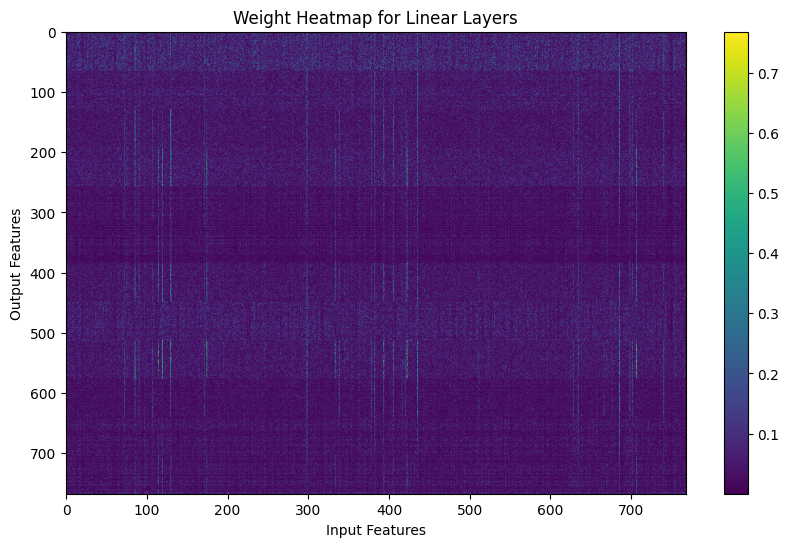

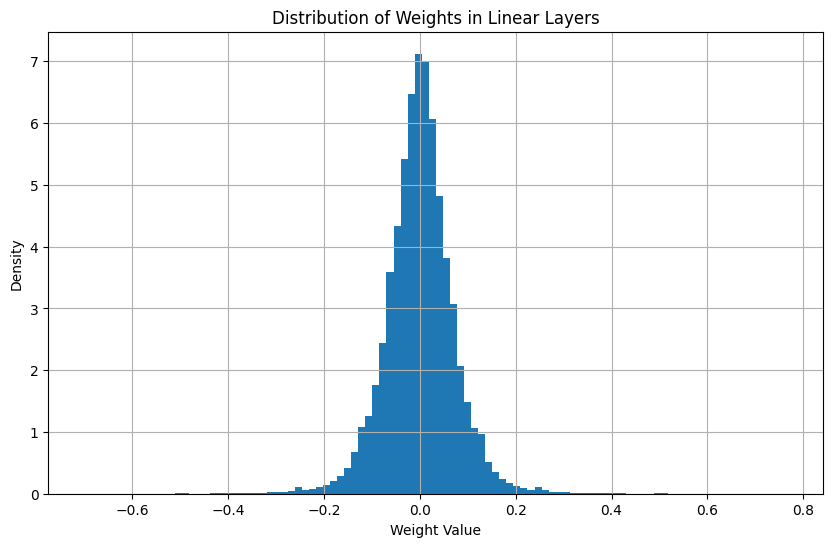

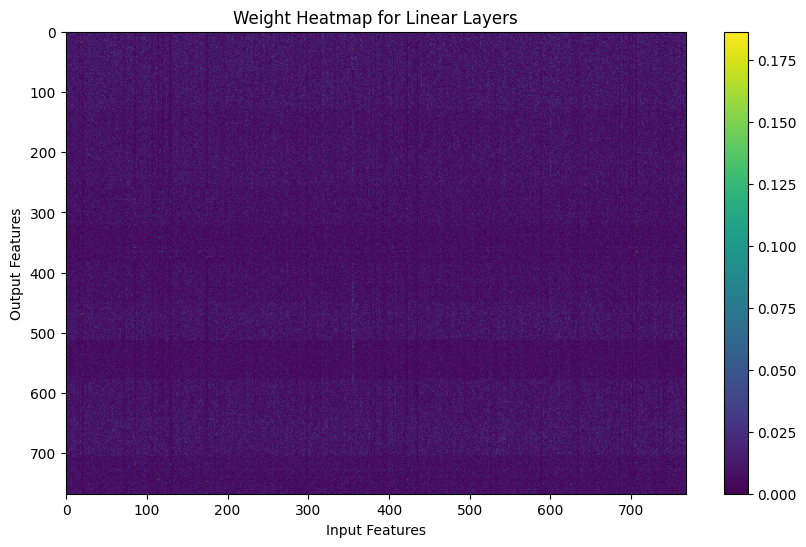

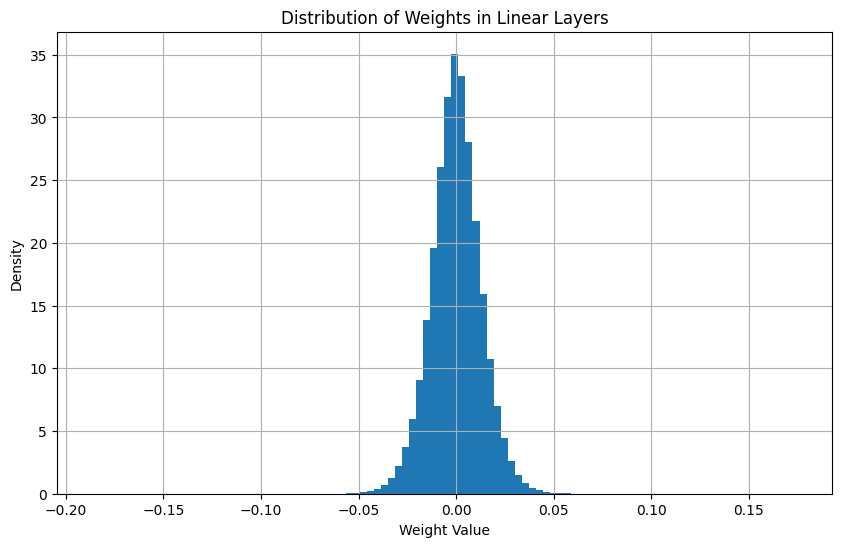

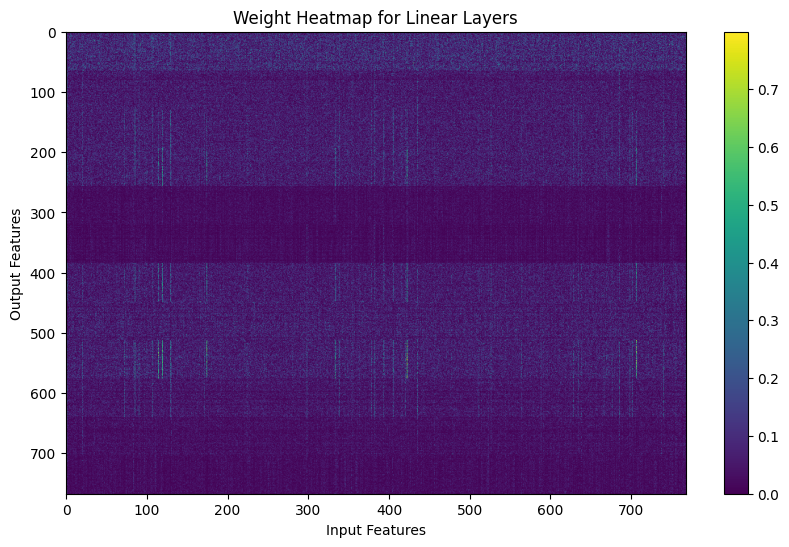

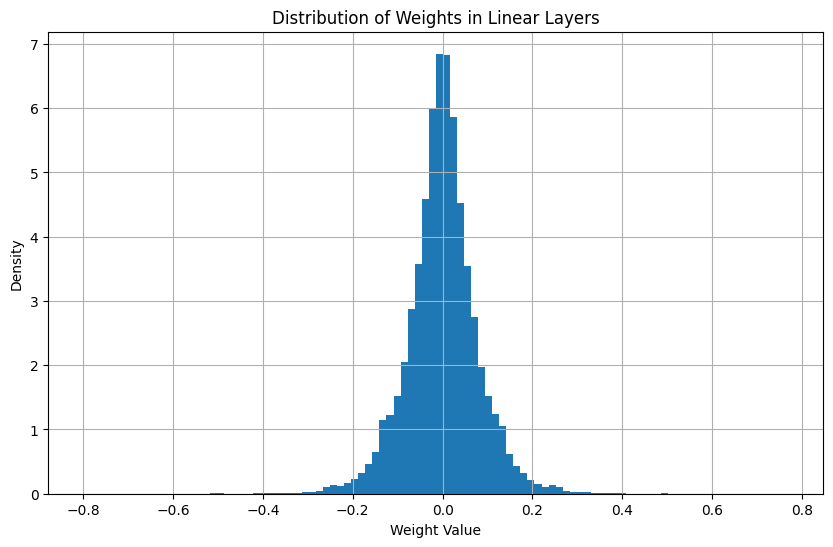

In [21]:

for i, (name, module) in enumerate(model.named_modules()):
    if isinstance(module, torch.nn.Linear):
        plot_weight_heatmap(model, name, title="Weight Heatmap for Linear Layers")
        plot_parameter_distribution(model, name, title="Distribution of Weights in Linear Layers")
    if i > 10:
        break

### 3.5 LLM activations

**Implementation task:**
- Implement a function that collects the activations of the model for a specific input sentence.
- Repeat the experiment for multiple LLMs.

**Questions:**
- What is the shape of the activations?

In [22]:
def collect_activations(model, tokenizer, prompt):
    """
    Collect activation values when processing an input prompt through the model.
    
    Args:
        model: PyTorch model
        tokenizer: Tokenizer
        prompt: Input text prompt
        
    Returns:
        Dictionary mapping layer names to their activation values
    """
    activations = {}
    
    ### To Complete ###
    ### End of To Complete ###
        
    return activations

In [23]:
prompt = "Hello, how are you?"
layer_activations = collect_activations(model, tokenizer, prompt)

# Print activation shapes for each layer
for name, activation in layer_activations.items():
    print(f"{name}: {activation.shape}")


model.decoder.layers.0.self_attn_layer_norm: torch.Size([1, 7, 768])
model.decoder.layers.0.self_attn.q_proj: torch.Size([1, 7, 768])
model.decoder.layers.0.self_attn.k_proj: torch.Size([1, 7, 768])
model.decoder.layers.0.self_attn.v_proj: torch.Size([1, 7, 768])
model.decoder.layers.0.self_attn.out_proj: torch.Size([1, 7, 768])
model.decoder.layers.0.final_layer_norm: torch.Size([7, 768])
model.decoder.layers.0.fc1: torch.Size([7, 3072])
model.decoder.layers.0.fc2: torch.Size([7, 768])
model.decoder.layers.1.self_attn_layer_norm: torch.Size([1, 7, 768])
model.decoder.layers.1.self_attn.q_proj: torch.Size([1, 7, 768])
model.decoder.layers.1.self_attn.k_proj: torch.Size([1, 7, 768])
model.decoder.layers.1.self_attn.v_proj: torch.Size([1, 7, 768])
model.decoder.layers.1.self_attn.out_proj: torch.Size([1, 7, 768])
model.decoder.layers.1.final_layer_norm: torch.Size([7, 768])
model.decoder.layers.1.fc1: torch.Size([7, 3072])
model.decoder.layers.1.fc2: torch.Size([7, 768])
model.decoder.la

**Implementation task:**
- Implement plotting functions that represent the activations in the form of a heatmap of absolute values and a distribution.
- Repeat the experiment for multiple input sentences and LLMs.

**Questions:**
- Does the activation heatmap shows some patterns?
- Does the activation distribution shows some patterns?

In [24]:
def plot_activation_heatmap(activation_tensor, title=None):
    """
    Plot a heatmap visualization of an activation tensor.
    
    Args:
        activation_tensor: PyTorch tensor of activations
        title: Title for the plot
    """
    ### To Complete ###
    ### End of To Complete ###

def plot_activation_distribution(activation_tensor, title=None):
    """
    Plot the distribution of activation values.
    
    Args:
        activation_tensor: PyTorch tensor of activations
        title: Title for the plot
    """
    ### To Complete ###
    # Convert to 1D numpy array
    activation_np = activation_tensor.flatten().numpy()
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(activation_np, bins=50, density=True)
    plt.title(title)
    plt.xlabel('Activation Value')
    plt.ylabel('Density')
    plt.show()
    ### End of To Complete ###


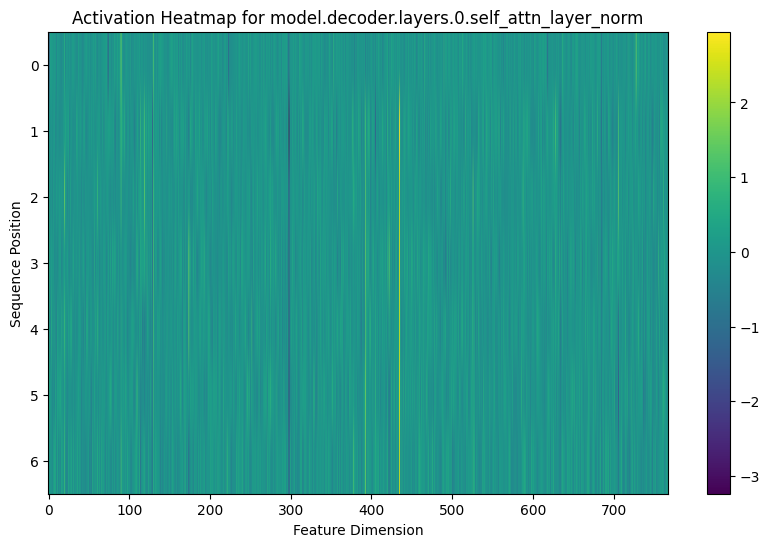

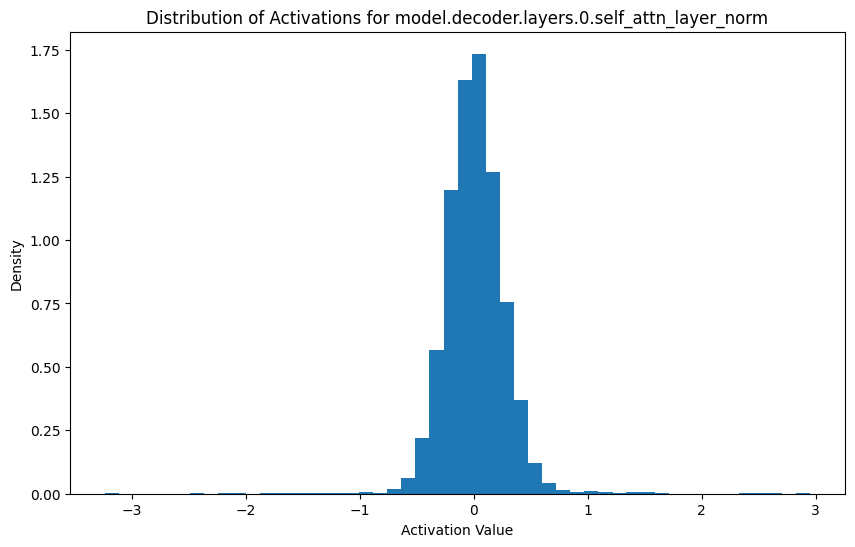

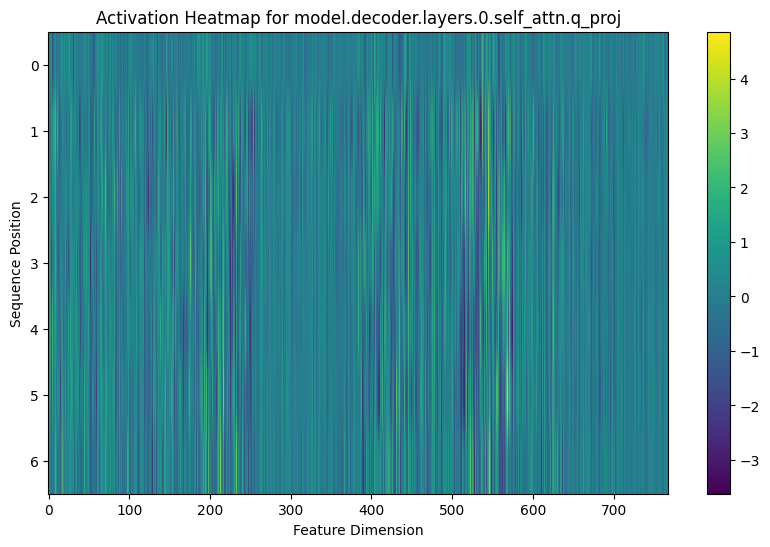

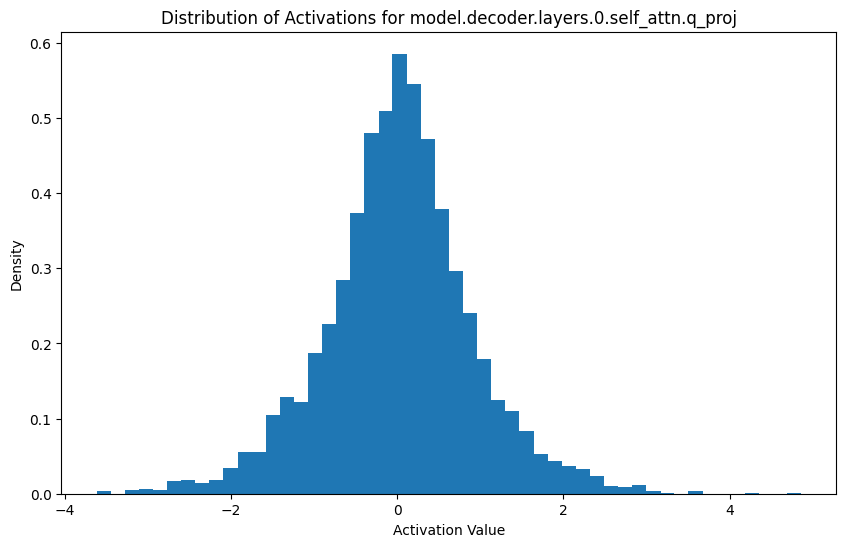

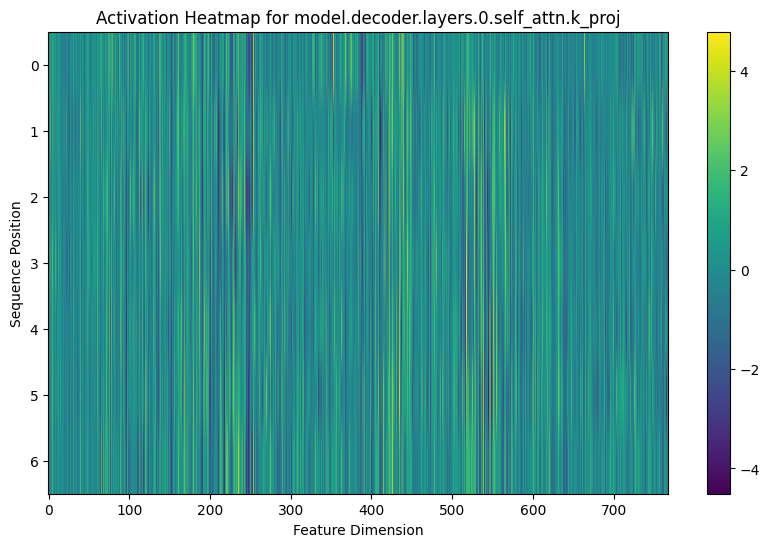

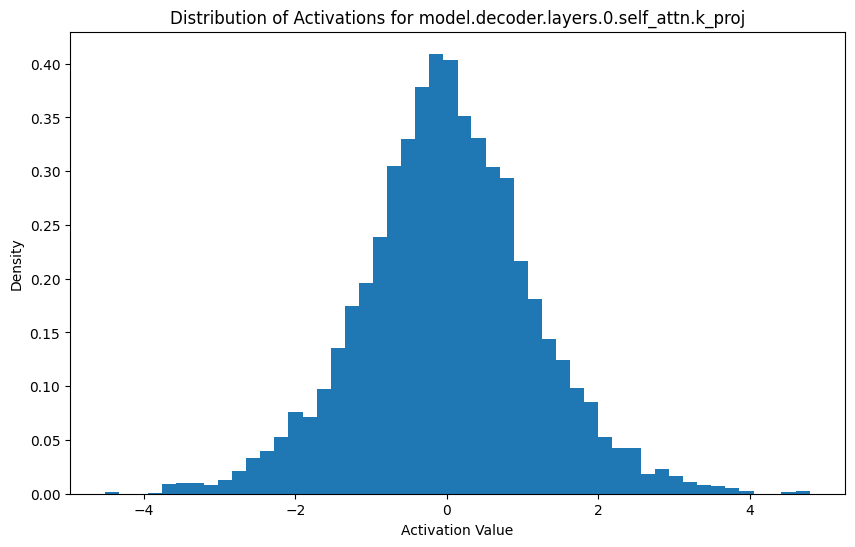

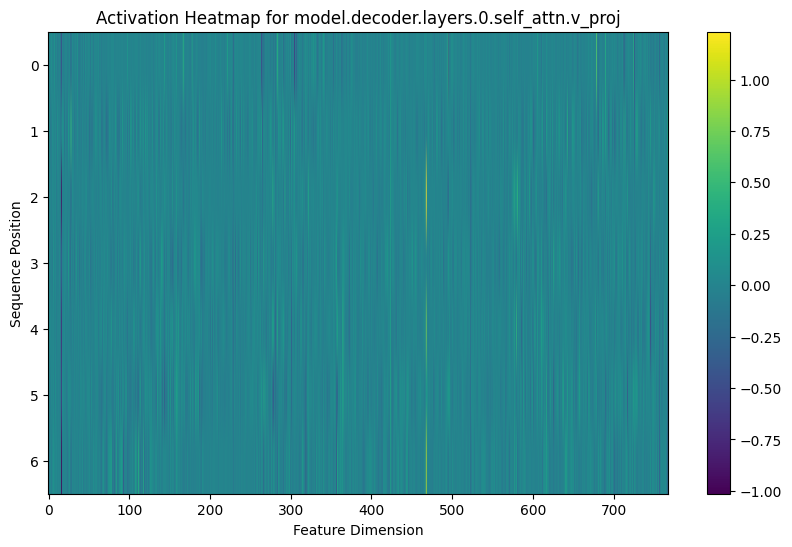

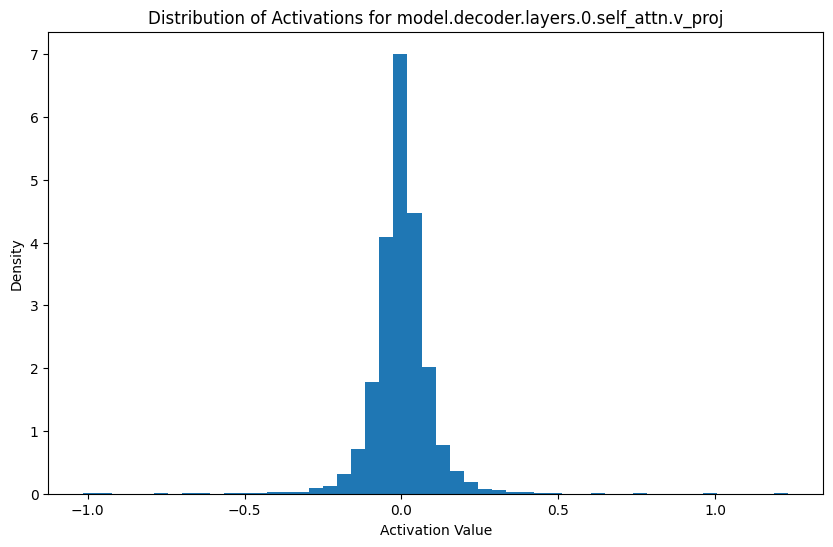

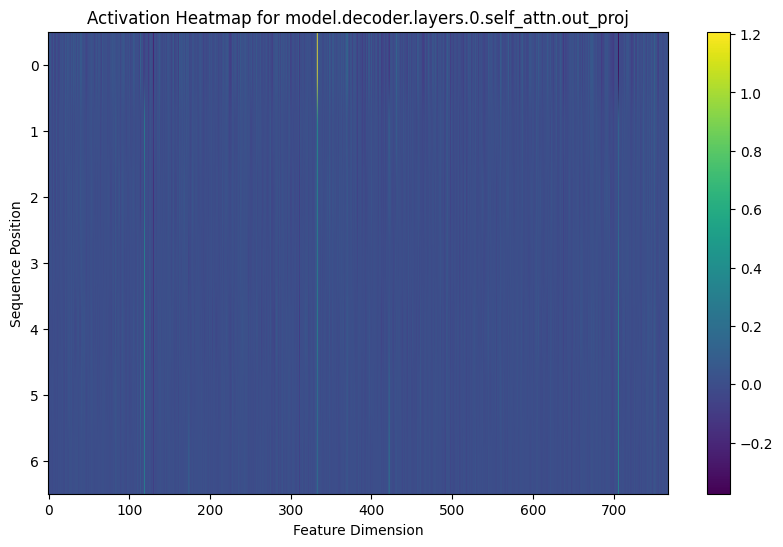

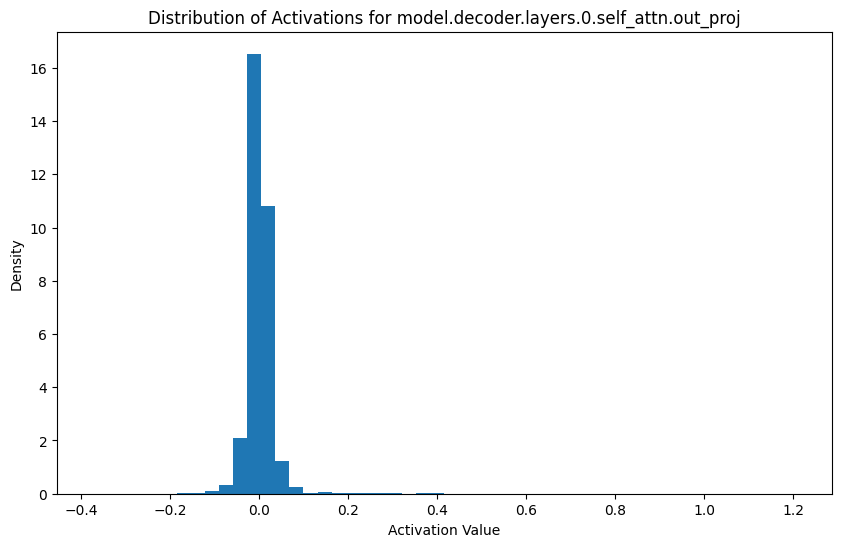

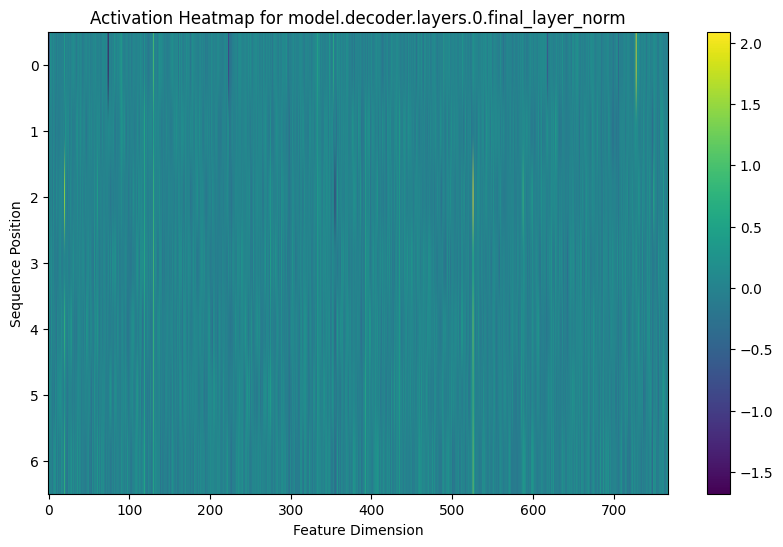

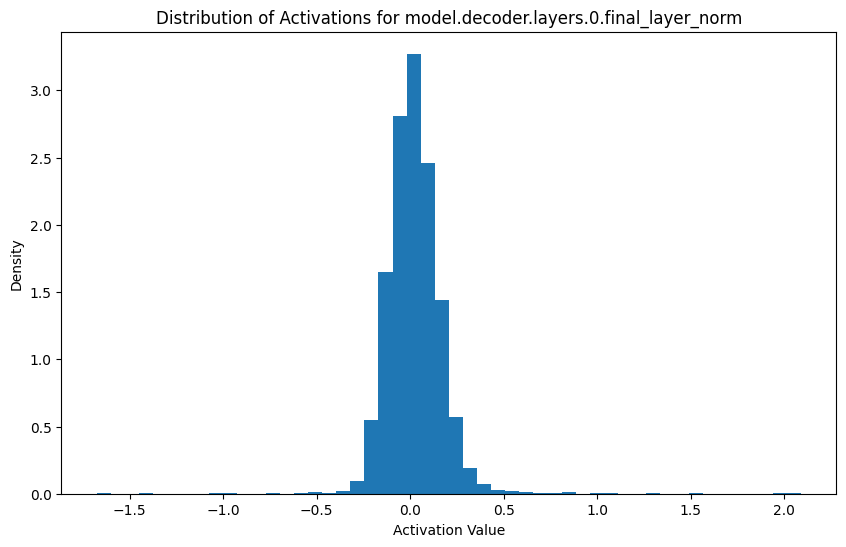

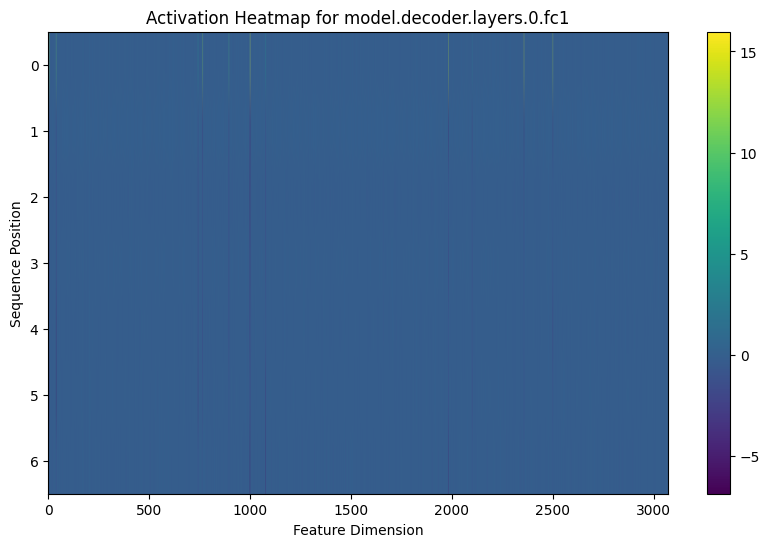

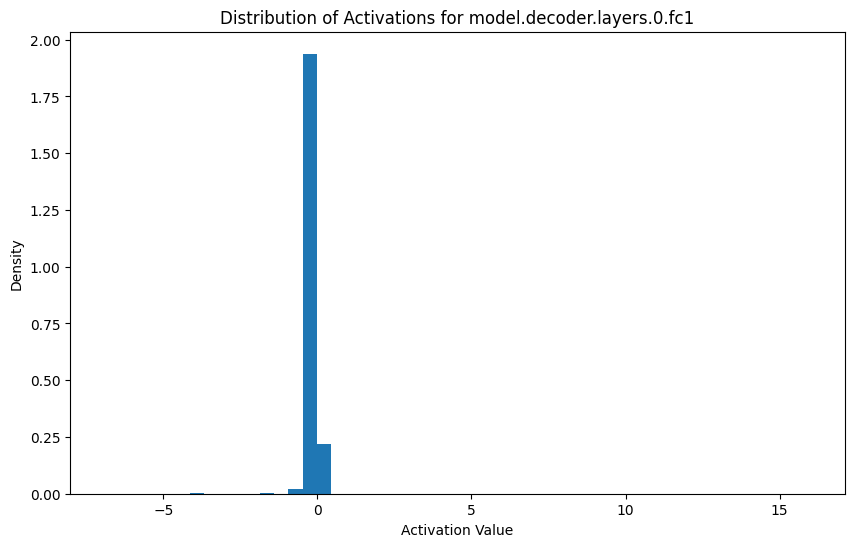

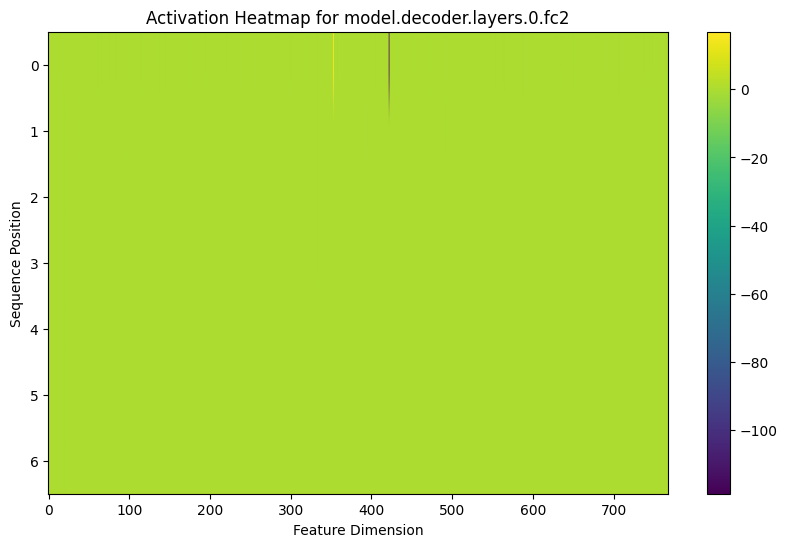

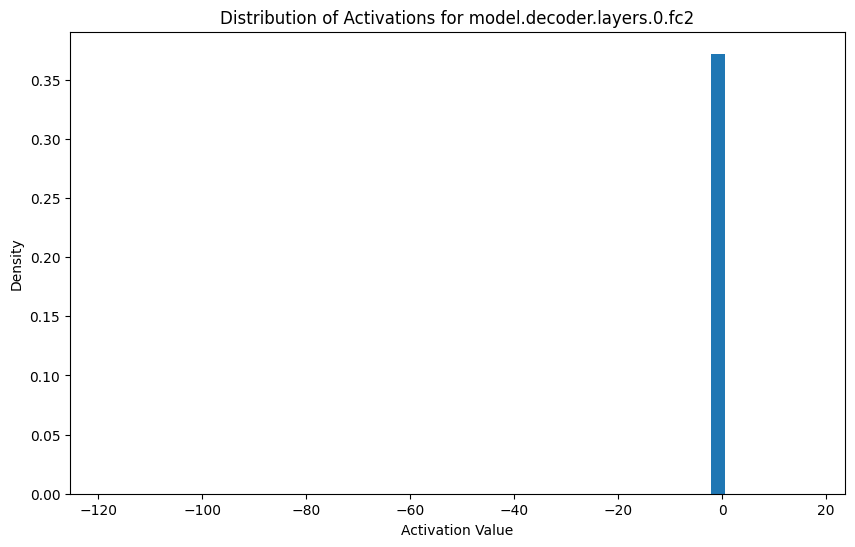

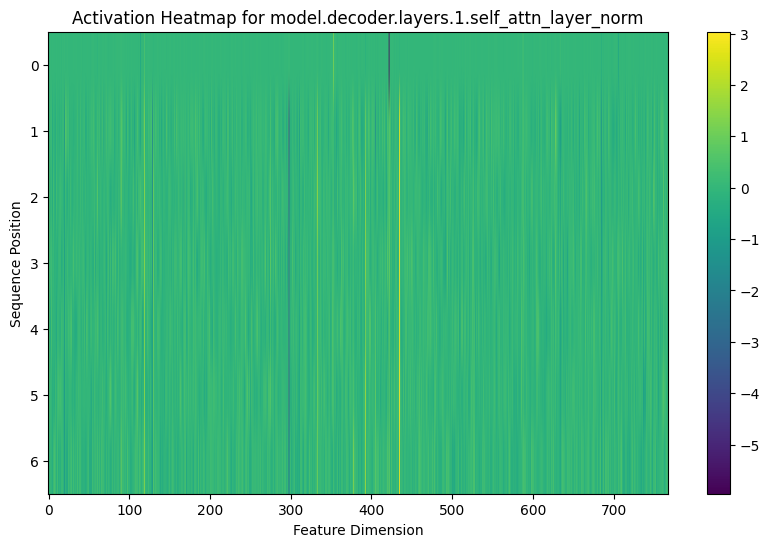

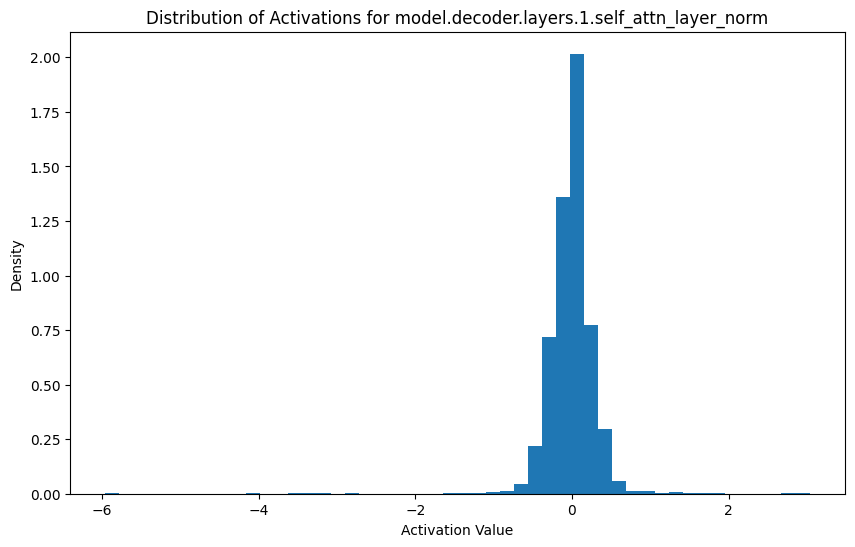

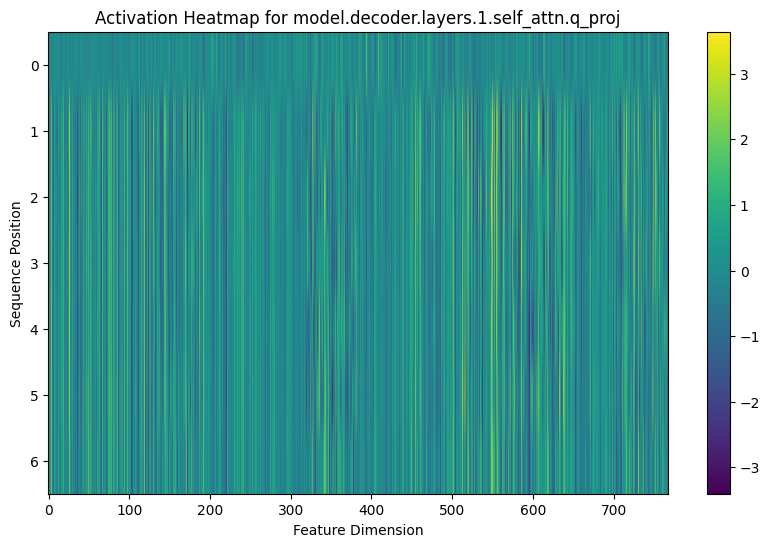

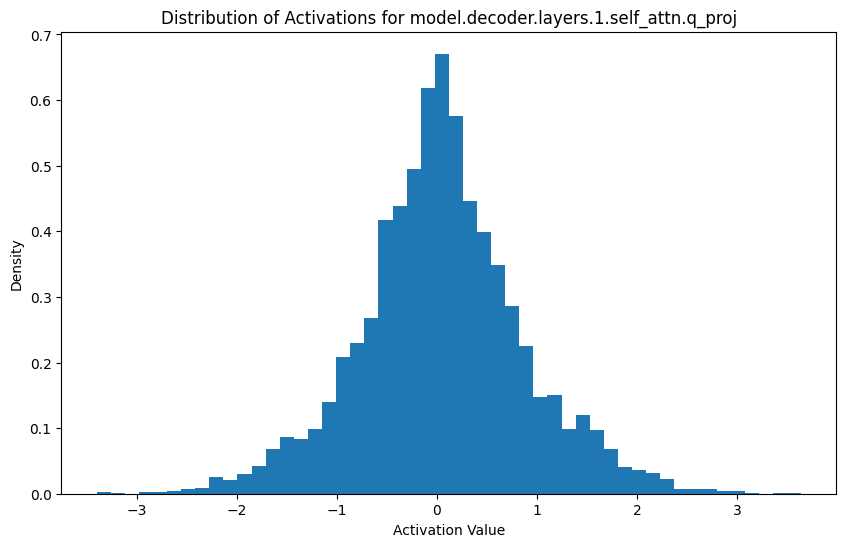

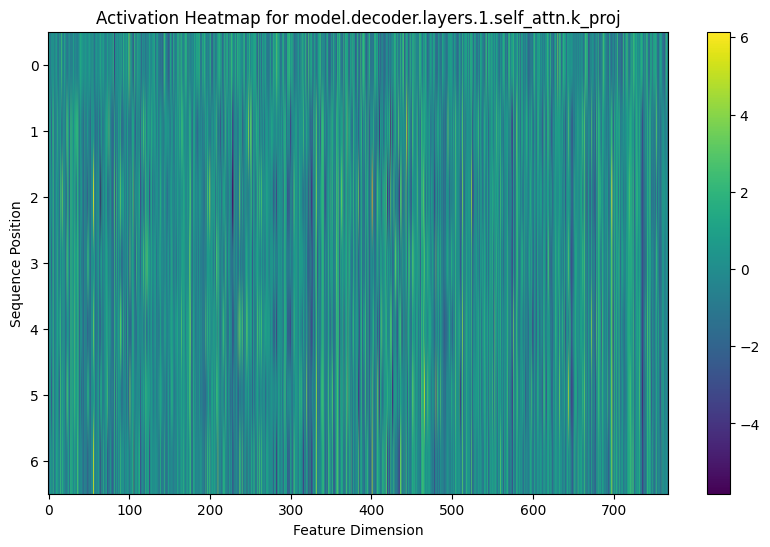

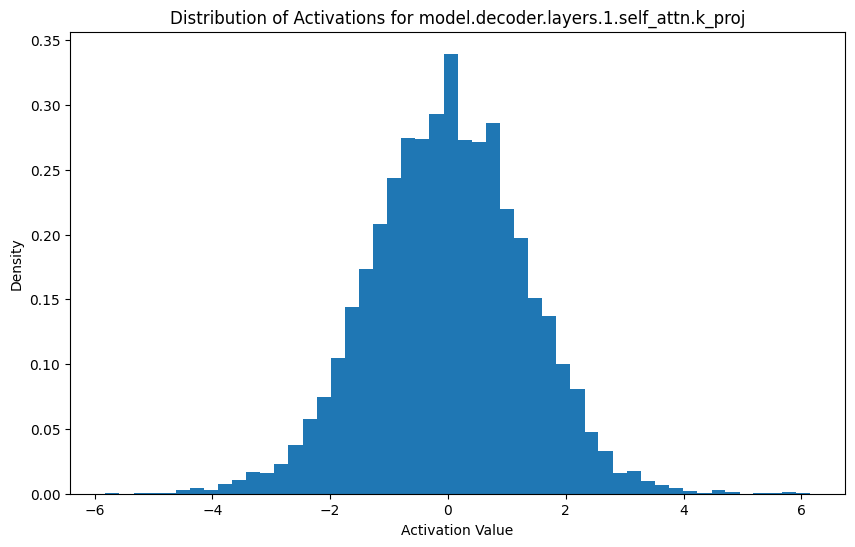

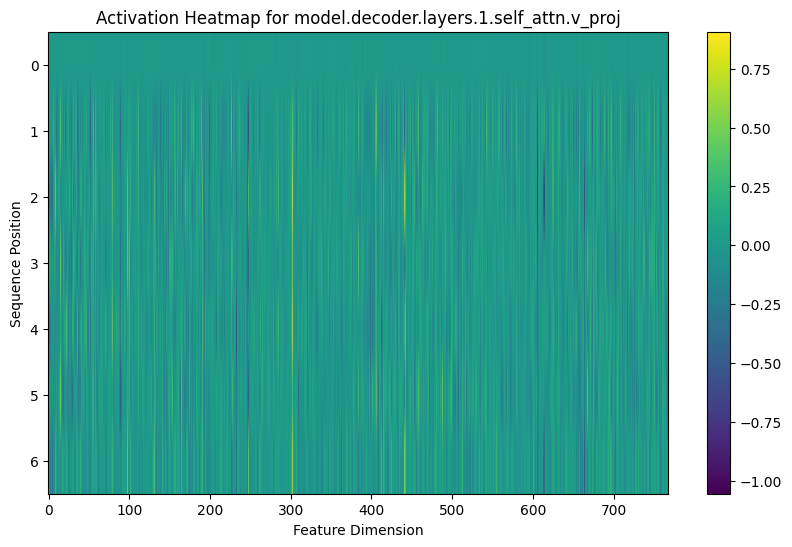

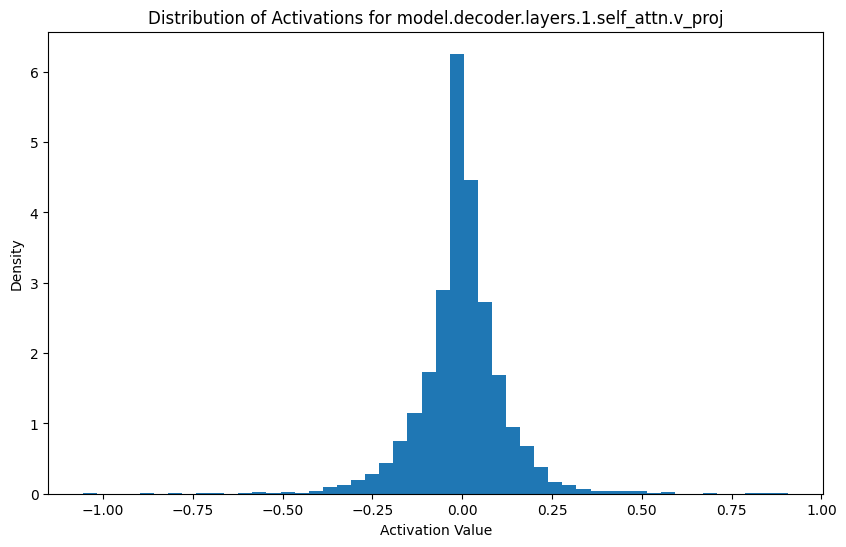

In [25]:
for i, (layer_name, activation) in enumerate(layer_activations.items()):
    plot_activation_heatmap(activation, title=f"Activation Heatmap for {layer_name}")
    plot_activation_distribution(activation, title=f"Distribution of Activations for {layer_name}")
    if i > 10:
        break


### 3.6 LLM attention scores

**Implementation task:**
- Implement a function that collects the attention scores of the model for a specific input sentence.
- Repeat the experiment for multiple input sentences and LLMs.

**Questions:**
- What is the shape of the attention scores?

In [26]:
def collect_attention_scores(model, tokenizer, prompt):
    """
    Collect attention scores from all layers when processing a prompt.
    
    Args:
        model: The transformer model
        tokenizer: The tokenizer to use
        prompt: Input text prompt
        
    Returns:
        Dictionary mapping layer names to attention score tensors
    """
    attention_scores = {}

    ### To Complete ###
    ### End of To Complete ###

    return attention_scores


In [27]:
attention_scores = collect_attention_scores(model, tokenizer, prompt)

# Print attention score shapes for each layer
for layer_name, attention_score in attention_scores.items():
    print(f"{layer_name}: {attention_score.shape}")

OPTModel is using SDPA attention, which currently does not support output_attentions=True.failing back to eager attention. remove warning using attn_implementation="eager".


layer_0_attention: torch.Size([1, 12, 7, 7])
layer_1_attention: torch.Size([1, 12, 7, 7])
layer_2_attention: torch.Size([1, 12, 7, 7])
layer_3_attention: torch.Size([1, 12, 7, 7])
layer_4_attention: torch.Size([1, 12, 7, 7])
layer_5_attention: torch.Size([1, 12, 7, 7])
layer_6_attention: torch.Size([1, 12, 7, 7])
layer_7_attention: torch.Size([1, 12, 7, 7])
layer_8_attention: torch.Size([1, 12, 7, 7])
layer_9_attention: torch.Size([1, 12, 7, 7])
layer_10_attention: torch.Size([1, 12, 7, 7])
layer_11_attention: torch.Size([1, 12, 7, 7])


**Implementation task:**
- Implement plotting functions that represent the attention scores in the form of a heatmap of absolute values.
- Repeat the experiment for multiple input sentences and LLMs.

**Questions:**
- Does the attention heatmap shows some patterns?

In [28]:
def plot_attention_heatmap(attention_scores, layer_idx=0, head_idx=0):
    """
    Plot attention heatmap for a specific layer and attention head.
    
    Args:
        attention_scores: Dictionary of attention scores from collect_attention_scores()
        layer_idx: Index of the transformer layer to visualize (default: 0)
        head_idx: Index of the attention head to visualize (default: 0)
    """

    ### To Complete ###
    layer_name = f"layer_{layer_idx}_attention"
    attention_matrix = attention_scores[layer_name][0, head_idx].numpy()  # Get first batch, selected head
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(attention_matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'Attention Heatmap - Layer {layer_idx}, Head {head_idx}')
    plt.xlabel('Key tokens')
    plt.ylabel('Query tokens')
    plt.show()
    ### End of To Complete ###

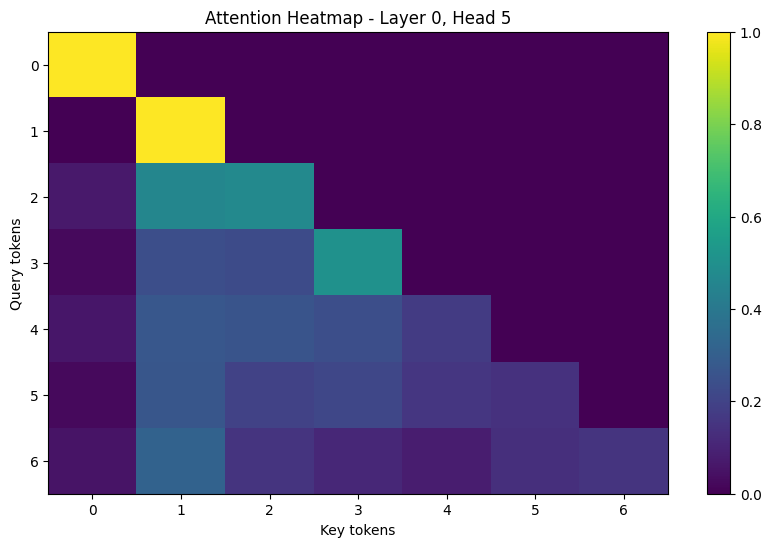

In [29]:
plot_attention_heatmap(attention_scores, layer_idx=0, head_idx=5)

## 4. Bonus: Make the architecture analysis on a quantized model